In [1]:
import os.path

from torch.utils.data.datapipes.utils.decoder import imagehandler

from torchdata.datapipes.iter import FileOpener, IterableWrapper, Mapper, RoutedDecoder, TarArchiveLoader

In [2]:
ROOT = '/mnt/c/Users/adria/Downloads'

In [3]:
def collate_sample(data):
    path, image = data
    dir = os.path.split(os.path.dirname(path))[1]
    label_str, cls = dir.split(".")
    return {"path": path, "image": image, "label": int(label_str), "cls": cls}

In [4]:
def Caltech256(root=ROOT):
    dp = IterableWrapper([os.path.join(root, "256_ObjectCategories.tar")])
    dp = FileOpener(dp, mode="b")
    dp = TarArchiveLoader(dp)
    dp = RoutedDecoder(dp, imagehandler("pil"))
    dp = Mapper(dp, collate_sample)
    return dp

In [5]:
for sample in Caltech256():
    break

In [6]:
sample

{'path': '/mnt/c/Users/adria/Downloads/256_ObjectCategories.tar/256_ObjectCategories/001.ak47/001_0001.jpg',
 'image': <PIL.Image.Image image mode=RGB size=499x278 at 0x7F2CDAB64B20>,
 'label': 1,
 'cls': 'ak47'}

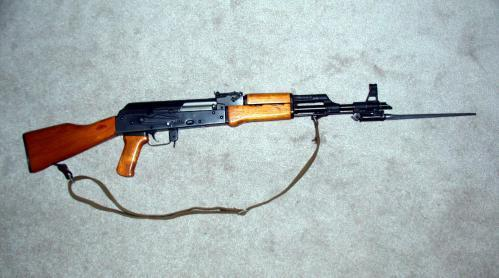

In [7]:
sample['image']

# Dataloading

In [8]:
from torch.utils.data import DataLoader
import torch
from torchvision import transforms

In [9]:
def collate_sample(data):
    path, image = data
    dir = os.path.split(os.path.dirname(path))[1]
    label_str, cls = dir.split(".")
    return {"path": path, "image": image, "label": int(label_str), "cls": cls}

def resize(data):
    data['image'] = data['image'].resize((224,224))
    return data

def to_tensor(data): 
    data['image'] = transforms.ToTensor()(data['image'])
    return data

def Caltech256(root=ROOT):
    dp = IterableWrapper([os.path.join(root, "256_ObjectCategories.tar")])
    dp = FileOpener(dp, mode="b")
    dp = TarArchiveLoader(dp)
    dp = RoutedDecoder(dp, imagehandler("pil"))
    dp = Mapper(dp, collate_sample)
    dp = Mapper(dp, resize)
    dp = Mapper(dp, to_tensor)
    return dp

datapipe = Caltech256()

In [10]:
next(iter(datapipe))

{'path': '/mnt/c/Users/adria/Downloads/256_ObjectCategories.tar/256_ObjectCategories/001.ak47/001_0001.jpg',
 'image': tensor([[[0.3569, 0.3882, 0.4314,  ..., 0.5412, 0.5373, 0.5373],
          [0.3490, 0.3882, 0.4196,  ..., 0.5647, 0.5412, 0.5373],
          [0.3529, 0.3922, 0.4157,  ..., 0.5882, 0.5490, 0.5412],
          ...,
          [0.4667, 0.5098, 0.5059,  ..., 0.5098, 0.5333, 0.4902],
          [0.4510, 0.5059, 0.4863,  ..., 0.4863, 0.5020, 0.4863],
          [0.4353, 0.4980, 0.4706,  ..., 0.4667, 0.4745, 0.4745]],
 
         [[0.4078, 0.4392, 0.4824,  ..., 0.6000, 0.5922, 0.5843],
          [0.4000, 0.4392, 0.4706,  ..., 0.6275, 0.5961, 0.5882],
          [0.4039, 0.4431, 0.4667,  ..., 0.6471, 0.6078, 0.5961],
          ...,
          [0.5137, 0.5569, 0.5529,  ..., 0.5255, 0.5490, 0.5098],
          [0.4980, 0.5529, 0.5333,  ..., 0.5020, 0.5216, 0.5059],
          [0.4824, 0.5451, 0.5176,  ..., 0.4824, 0.4902, 0.4941]],
 
         [[0.4392, 0.4706, 0.5137,  ..., 0.6275, 0.623

In [11]:
dl = DataLoader(dataset=datapipe, batch_size=4, shuffle=True)

In [12]:
for sample in dl:
    break

In [13]:
sample

{'path': ['/mnt/c/Users/adria/Downloads/256_ObjectCategories.tar/256_ObjectCategories/001.ak47/001_0001.jpg',
  '/mnt/c/Users/adria/Downloads/256_ObjectCategories.tar/256_ObjectCategories/001.ak47/001_0002.jpg',
  '/mnt/c/Users/adria/Downloads/256_ObjectCategories.tar/256_ObjectCategories/001.ak47/001_0003.jpg',
  '/mnt/c/Users/adria/Downloads/256_ObjectCategories.tar/256_ObjectCategories/001.ak47/001_0004.jpg'],
 'image': tensor([[[[0.3569, 0.3882, 0.4314,  ..., 0.5412, 0.5373, 0.5373],
           [0.3490, 0.3882, 0.4196,  ..., 0.5647, 0.5412, 0.5373],
           [0.3529, 0.3922, 0.4157,  ..., 0.5882, 0.5490, 0.5412],
           ...,
           [0.4667, 0.5098, 0.5059,  ..., 0.5098, 0.5333, 0.4902],
           [0.4510, 0.5059, 0.4863,  ..., 0.4863, 0.5020, 0.4863],
           [0.4353, 0.4980, 0.4706,  ..., 0.4667, 0.4745, 0.4745]],
 
          [[0.4078, 0.4392, 0.4824,  ..., 0.6000, 0.5922, 0.5843],
           [0.4000, 0.4392, 0.4706,  ..., 0.6275, 0.5961, 0.5882],
           [0.4039,

In [14]:
sample['image'].shape

torch.Size([4, 3, 224, 224])